# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'/Users/maxime/IronHack/Labs/module_2/Lab_8_Storytelling/housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [26]:
# your code here
df = df.drop(columns='Id')
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [27]:
# your code here
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
...,...,...
Heating,Heating,0.000000
HeatingQC,HeatingQC,0.000000
MSZoning,MSZoning,0.000000
1stFlrSF,1stFlrSF,0.000000


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [28]:
# your code here
filterDrop = missing_value_df[missing_value_df['percent_missing']>20]
colDrop = filterDrop['column_name']
colDrop


PoolQC              PoolQC
MiscFeature    MiscFeature
Alley                Alley
Fence                Fence
FireplaceQu    FireplaceQu
Name: column_name, dtype: object

In [29]:
df = df.drop(columns=colDrop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

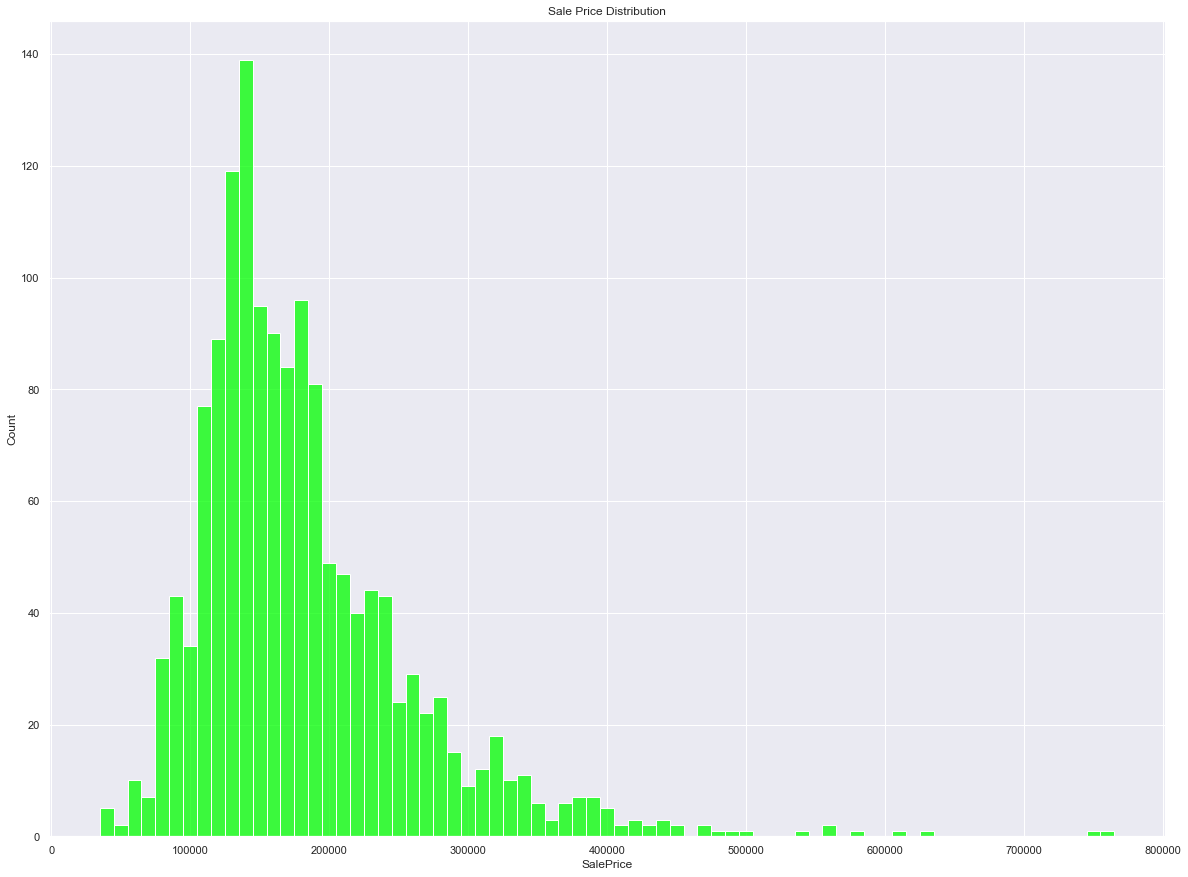

In [42]:
# your code here
ax = sns.histplot(data=df['SalePrice'],color="lime",  binwidth=10000)
sns.set(rc = {'figure.figsize':(20,15)})
ax.set_title('Sale Price Distribution')
ax.set_ylabel('Count')
plt.show()


In [ ]:
# We notice a right skewed distribution


## Challenge 2 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

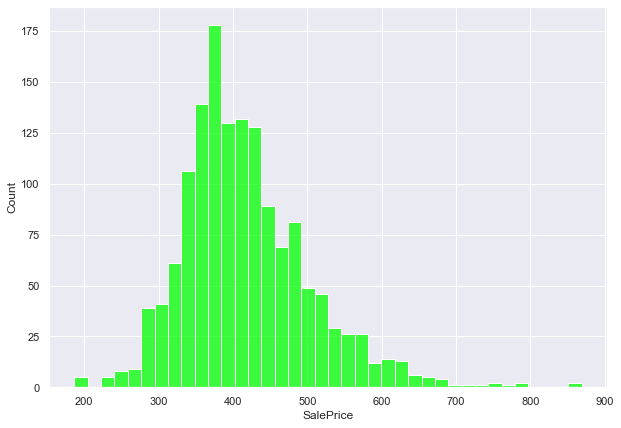

In [46]:
# Square Root Transform
priceSquare = np.sqrt(df['SalePrice'])
sns.histplot(data=priceSquare,color="lime")
sns.set(rc = {'figure.figsize':(10,7)})
plt.show()

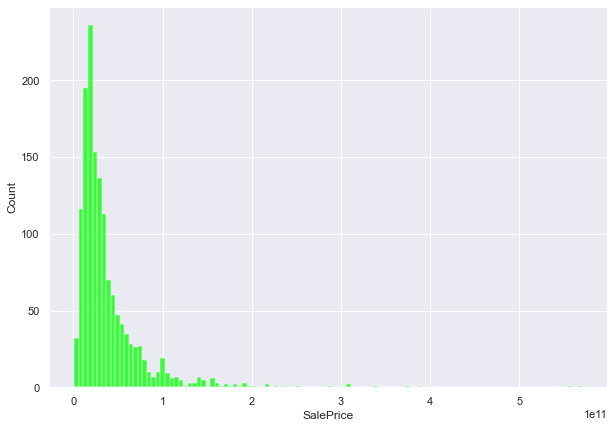

In [51]:
# Square Power (expo) Transform
pricePower = np.power(df['SalePrice'], 2)
sns.histplot(data=pricePower, color="lime")
sns.set(rc = {'figure.figsize':(10,7)})
plt.show()

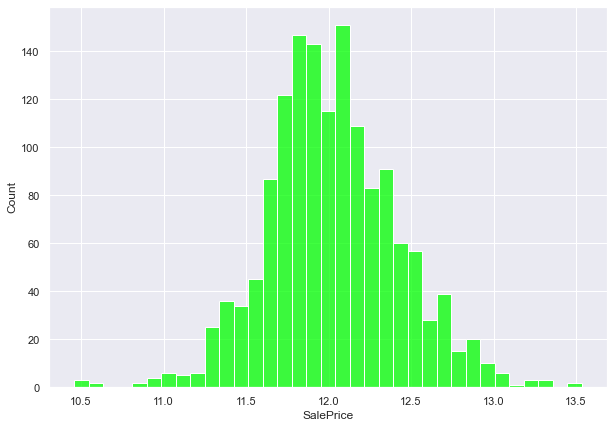

In [52]:
# Log transform
priceLog = np.log(df['SalePrice'])
sns.histplot(data=priceLog,color="lime")
sns.set(rc = {'figure.figsize':(10,7)})
plt.show()

# create column priceAdjusted
df['SalePriceAdjusted'] = np.log(df['SalePrice'])

## Challenge 3 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

### Size of the house

<function matplotlib.pyplot.show(close=None, block=None)>

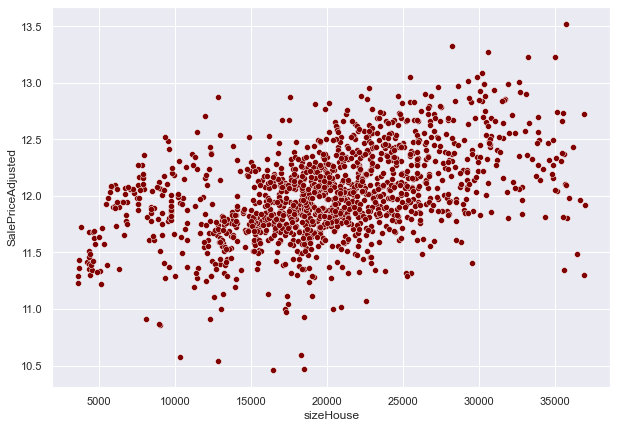

In [67]:
# the 3 features are in the same units (square feet)
# creating new column : siz_house indicator
df['sizeHouse'] = df['GrLivArea'] + df['LotArea'] + df['LotArea']
# get rid of outliers
sizeHouseCleaned = df[df['sizeHouse']<37000]
sns.scatterplot(x='sizeHouse', y='SalePriceAdjusted', data=sizeHouseCleaned, color='maroon')
plt.show

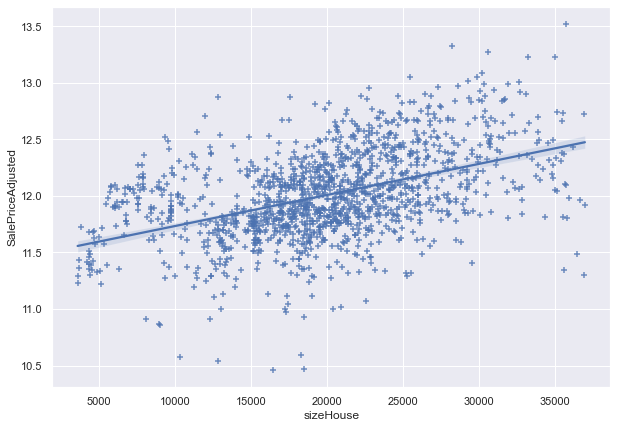

In [71]:
# regression analysis
sns.regplot(x='sizeHouse', y='SalePriceAdjusted', marker="+", data=sizeHouseCleaned)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


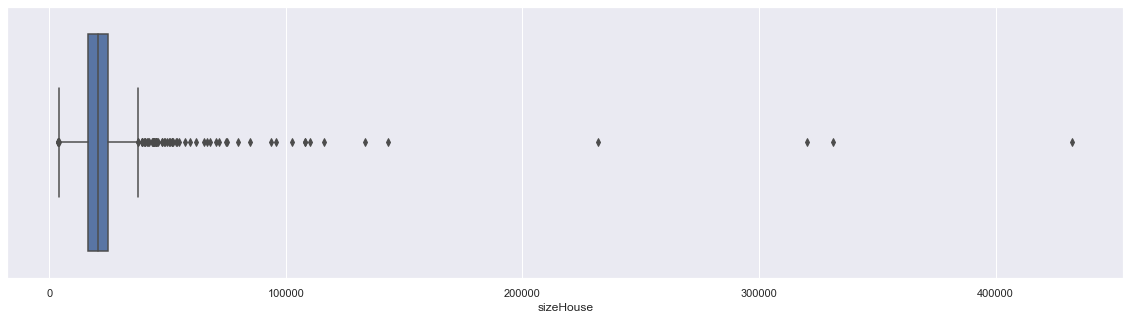

In [82]:
#identify ouliers
sns.boxplot(df['sizeHouse'])# add showfliers = False
sns.set(rc = {'figure.figsize':(5,20)})

### Number of rooms

In [85]:
#(BedroomAbvGr, KitchenAbvGr, FullBath, HalfBath, BsmtFullBath, BsmtHalfBath).
# create new rooms indicator
df['bathByRoom'] = (df['FullBath'] + 0.5*df['HalfBath'] + 0.75*df['BsmtFullBath'] + 0.75*0.5*df['FullBath'])/ df['TotRmsAbvGrd']

df[['BedroomAbvGr', 'KitchenAbvGr','FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'bathByRoom']]

,BedroomAbvGr,KitchenAbvGr,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,bathByRoom
0,3,1,2,1,1,0,0.500000
1,3,1,2,0,0,1,0.458333
2,3,1,2,1,1,0,0.666667
3,3,1,1,0,1,0,0.303571
4,4,1,2,1,1,0,0.444444
...,...,...,...,...,...,...,...
1455,3,1,2,1,0,0,0.464286
1456,3,1,2,0,1,0,0.500000
1457,4,1,2,0,0,0,0.305556
1458,2,1,1,0,1,0,0.425000


<function matplotlib.pyplot.show(close=None, block=None)>

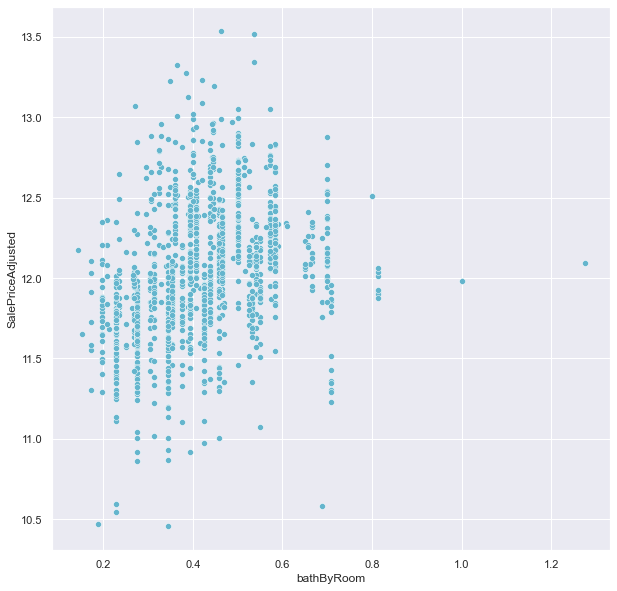

In [99]:
sns.scatterplot(x='bathByRoom', y='SalePriceAdjusted', data=df, color='c')
sns.set(rc = {'figure.figsize':(10,10)})
plt.show

### How long the house has been built or remodeled

In [100]:
# YearBuilt and YearRemodAdd
df[['YearBuilt' ,'YearRemodAdd']]

,YearBuilt,YearRemodAdd
0,2003,2003
1,1976,1976
2,2001,2002
3,1915,1970
4,2000,2000
...,...,...
1455,1999,2000
1456,1978,1988
1457,1941,2006
1458,1950,1996


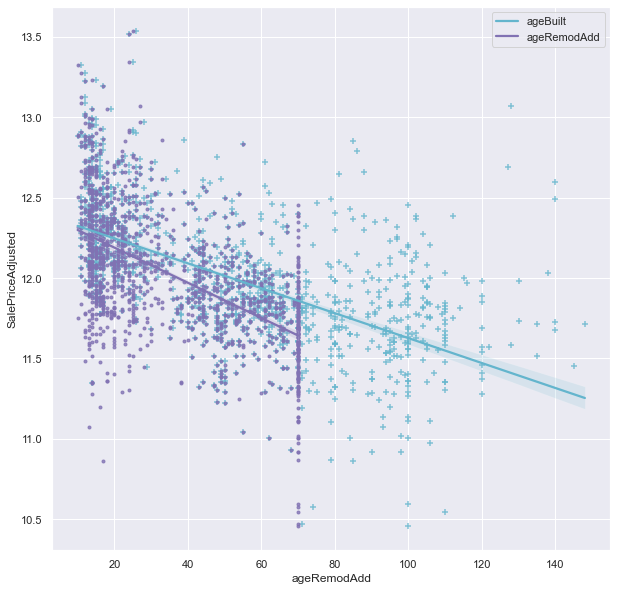

In [108]:
# new columns
df['ageBuilt'] = 2020 - df['YearBuilt']
df['ageRemodAdd'] = 2020 - df['YearRemodAdd']

#plot
sns.regplot(x='ageBuilt', y='SalePriceAdjusted', marker="+", data=df, color='c')
sns.regplot(x='ageRemodAdd', y='SalePriceAdjusted', marker=".", data=df, color='m')
sns.set(rc = {'figure.figsize':(10,10)})
plt.legend(labels=["ageBuilt","ageRemodAdd"])
plt.show()

### Neighborhood of the house

<function matplotlib.pyplot.show(close=None, block=None)>

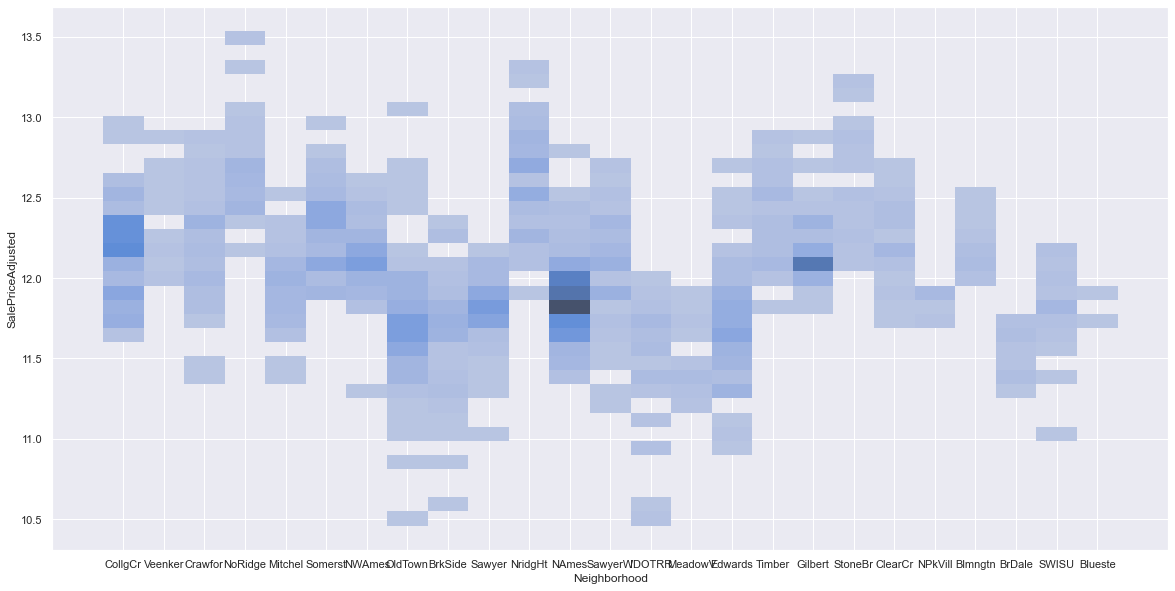

In [118]:
# Neighborhood
#neigh = df.groupby['Neigh']
df['Neighborhood'].unique()
sns.histplot(x='Neighborhood', y='SalePriceAdjusted', data=df, color='b')
sns.set(rc = {'figure.figsize':(20,10)})
plt.show

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePriceAdjusted'>

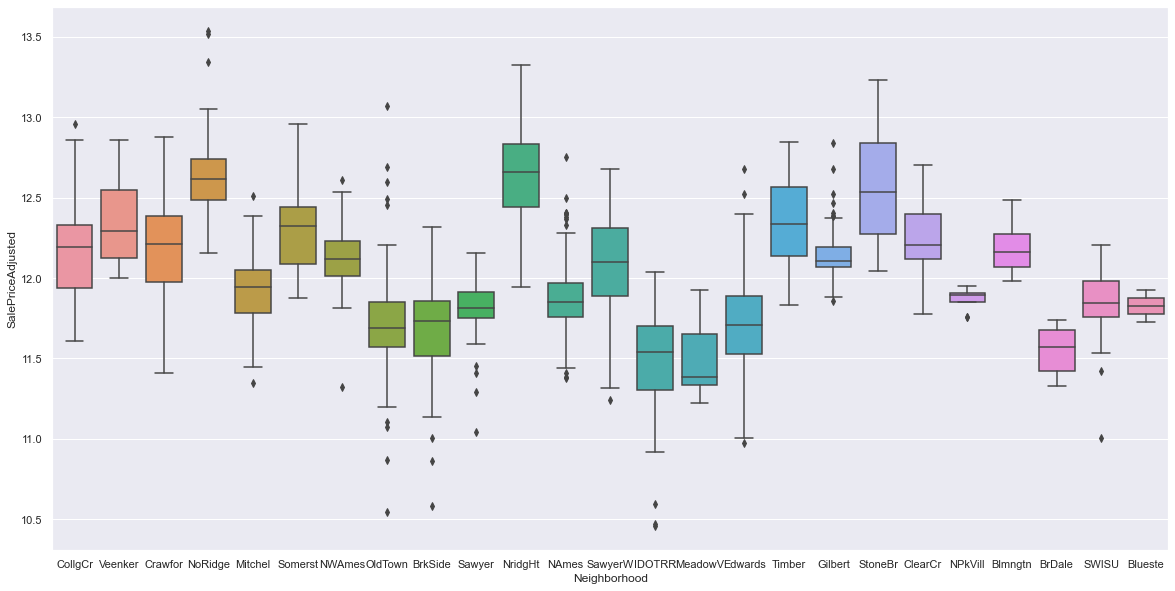

In [120]:
sns.boxplot(x ='Neighborhood', y ='SalePriceAdjusted', data = df)

## Challenge 4 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

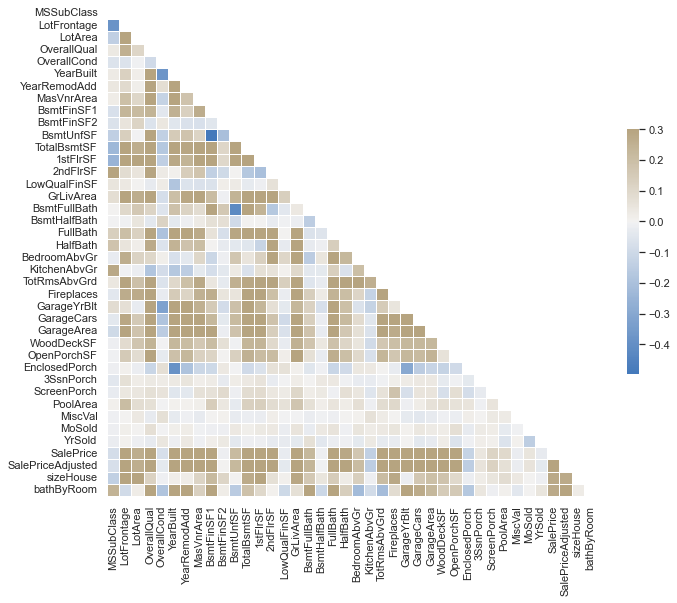

In [127]:
#drop column created to avoid artificial correlations
df2 = df.drop(columns=['ageRemodAdd', 'ageBuilt'])
# your code here
sns.set_theme(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 60, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.set(rc = {'figure.figsize':(20,10)})

plt.show()

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [ ]:
'''
the most positevely correlated variables are : Loft frontage, OverallQual, YearBuilt,MasVnArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, 2ndFlrSF,GrLivArea, FullBath, HalfBathTotRmsAbvGrd, Fireplace, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF

'''

## Challenge 5 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

In [132]:
dfcorr = df[['SalePriceAdjusted',
             'LotFrontage'
             , 'OverallQual'
             , 'YearBuilt'
             ,'MasVnrArea'
             , 'BsmtFinSF1'
             , 'TotalBsmtSF'
             , '1stFlrSF'
             , '2ndFlrSF'
             ,'GrLivArea'
             , 'FullBath'
             , 'Fireplaces'
             , 'GarageYrBlt'
             , 'GarageCars'
             , 'GarageArea'
             , 'WoodDeckSF'
             , 'OpenPorchSF'
            ]]

dfcorr.corr()
# The 5 most correlated variables to SalePrice are:
# 1.OverllQual (0.82)
# 2.GrLivArea (0.70)
# 3. GarageCars (0.68)
# 4. GarageArea (0.65)
# 5. TotalBsmtSF (0.61)


,SalePriceAdjusted,LotFrontage,OverallQual,YearBuilt,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
SalePriceAdjusted,1.000000,0.355878,0.817184,0.586570,0.430809,0.372023,0.612134,0.596981,0.319300,0.700927,0.594771,0.489449,0.541073,0.680625,0.650888,0.334135,0.321053
LotFrontage,0.355878,1.000000,0.251646,0.123349,0.193458,0.233633,0.392075,0.457181,0.080177,0.402797,0.198769,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972
OverallQual,0.817184,0.251646,1.000000,0.572323,0.411876,0.239666,0.537808,0.476224,0.295493,0.593007,0.550600,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819
YearBuilt,0.586570,0.123349,0.572323,1.000000,0.315707,0.249503,0.391452,0.281986,0.010308,0.199010,0.468271,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686
MasVnrArea,0.430809,0.193458,0.411876,0.315707,1.000000,0.264736,0.363936,0.344501,0.174561,0.390857,0.276833,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703
BsmtFinSF1,0.372023,0.233633,0.239666,0.249503,0.264736,1.000000,0.522396,0.445863,-0.137079,0.208171,0.058543,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761
TotalBsmtSF,0.612134,0.392075,0.537808,0.391452,0.363936,0.522396,1.000000,0.819530,-0.174512,0.454868,0.323722,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264
1stFlrSF,0.596981,0.457181,0.476224,0.281986,0.344501,0.445863,0.819530,1.000000,-0.202646,0.566024,0.380637,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671
2ndFlrSF,0.319300,0.080177,0.295493,0.010308,0.174561,-0.137079,-0.174512,-0.202646,1.000000,0.687501,0.421378,0.194561,0.070832,0.183926,0.138347,0.092165,0.208026
GrLivArea,0.700927,0.402797,0.593007,0.199010,0.390857,0.208171,0.454868,0.566024,0.687501,1.000000,0.630012,0.461679,0.231197,0.467247,0.468997,0.247433,0.330224


### 1. OverallQual vs Sale Price

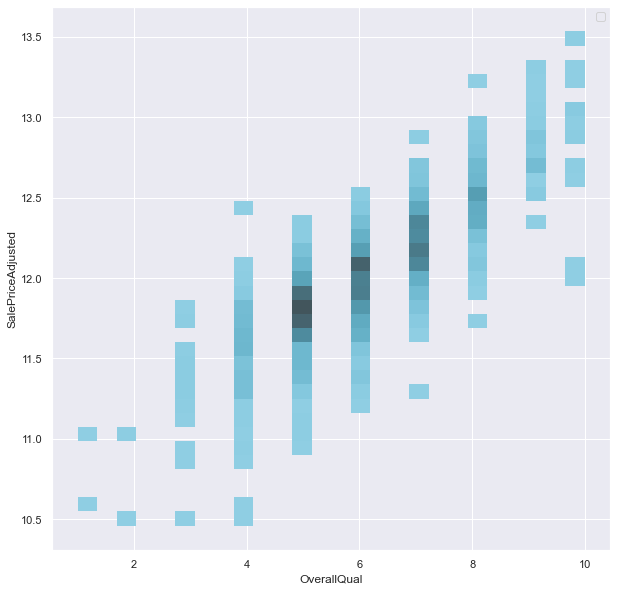

In [136]:
sns.regplot(x='GrLivArea', y='SalePriceAdjusted', marker="+", data=df, color='c')
sns.set(rc = {'figure.figsize':(10,10)})
plt.show()

'''
we clearly see a strong positive correlation with a concentration of houses between 5 and 6 overll quality'''

### 2. GrLivArea vs Sale Price

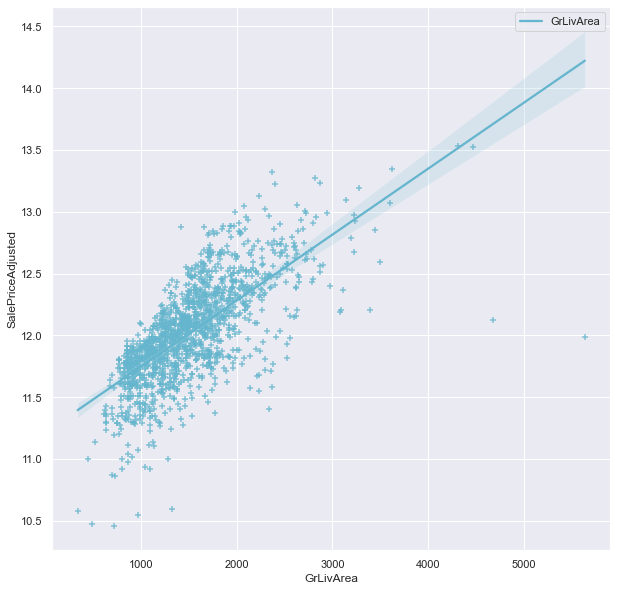

In [137]:
sns.regplot(x='GrLivArea', y='SalePriceAdjusted', marker="+", data=df, color='c')
sns.set(rc = {'figure.figsize':(10,10)})
plt.legend(labels=["GrLivArea"])
plt.show()

'''
the regression line fit the model and show the positive correlation between price and GrLivArea variable
'''

### 3. GarageCars vs Sale Price

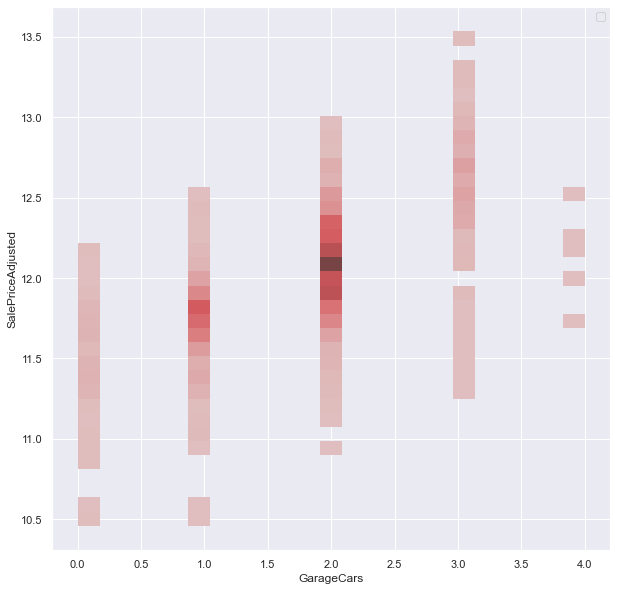

In [140]:
sns.histplot(x='GarageCars', y='SalePriceAdjusted', data=df, color='r')
sns.set(rc = {'figure.figsize':(10,10)})
plt.show()

'''we clearly see a positive correlation with a concentration of garage cars at 2 ''''''

### 4. GarageArea vs Sale Price

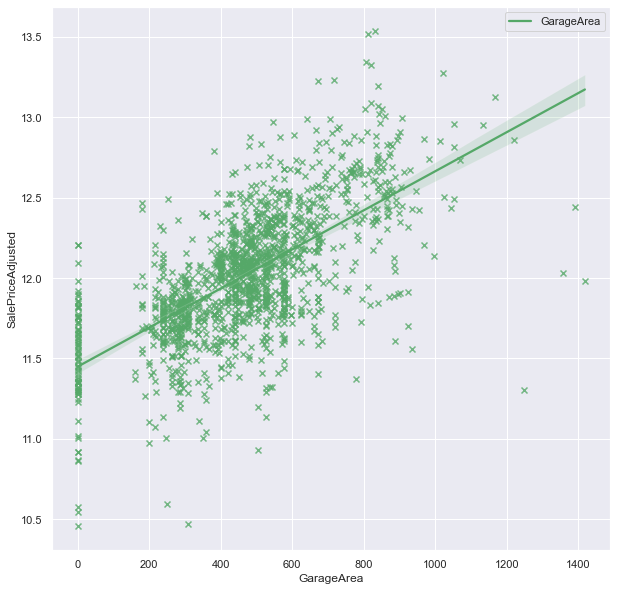

In [143]:
sns.regplot(x='GarageArea', y='SalePriceAdjusted', marker="x", data=df, color='g')
sns.set(rc = {'figure.figsize':(10,10)})
plt.legend(labels=["GarageArea"])
plt.show()
'''
the regression line fit the model and show the positive correlation between price and GarageArea variable
'''

### 5. TotalBsmtSF vs Sale Price

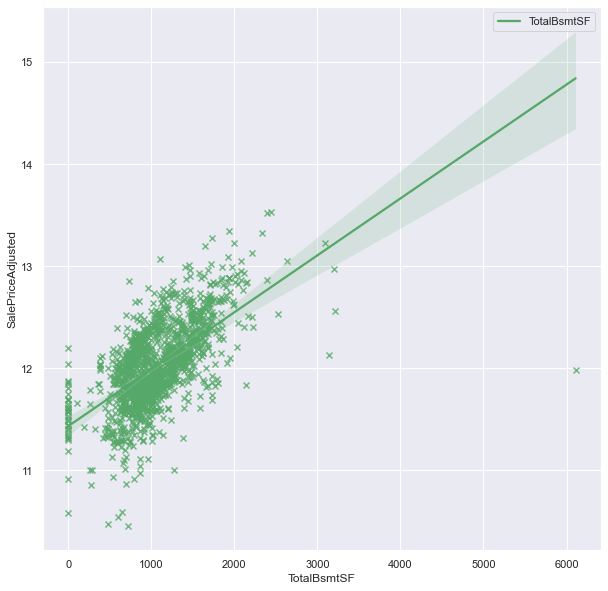

'\nthe regression line fit the model and show the positive correlation between price and GarageArea variable\n'

In [144]:
sns.regplot(x='TotalBsmtSF', y='SalePriceAdjusted', marker="x", data=df, color='g')
sns.set(rc = {'figure.figsize':(10,10)})
plt.legend(labels=["TotalBsmtSF"])
plt.show()
'''
the regression line fit the model and show the positive correlation between price and TotalBsmtSF variable
'''